In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("orders.csv")

In [7]:
df.reset_index(inplace= True)
df.columns
df.dtypes

level_0            int64
index              int64
Country; order    object
dtype: object

In [4]:
df

,index,Country; order
0,0,"USA;""122"""
1,1,"Germany;""122"""
2,2,"Brazil;""83"""
3,3,"France;""77"""
4,4,"UK;""56"""
5,5,"Venezuela;""46"""
6,6,"Austria;""40"""
7,7,"Sweden;""37"""
8,8,"Canada;""30"""
9,9,"Mexico;""28"""


In [8]:
df['Country; order']=df['Country; order'].astype(str)
df[["Country", "Order"]]=df["Country; order"].str.split(';',expand=True)
df

,level_0,index,Country; order,Country,Order
0,0,0,"USA;""122""",USA,"""122"""
1,1,1,"Germany;""122""",Germany,"""122"""
2,2,2,"Brazil;""83""",Brazil,"""83"""
3,3,3,"France;""77""",France,"""77"""
4,4,4,"UK;""56""",UK,"""56"""
5,5,5,"Venezuela;""46""",Venezuela,"""46"""
6,6,6,"Austria;""40""",Austria,"""40"""
7,7,7,"Sweden;""37""",Sweden,"""37"""
8,8,8,"Canada;""30""",Canada,"""30"""
9,9,9,"Mexico;""28""",Mexico,"""28"""


In [9]:
df["Orders"] = df['Order'].str.replace('[^\w\s]','')
df= df.drop(columns= "Country; order")
df= df.drop(columns= "Order")
df["Orders"]= df["Orders"].astype(int)
df

/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_52567/3582582119.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Orders"] = df['Order'].str.replace('[^\w\s]','')


,level_0,index,Country,Orders
0,0,0,USA,122
1,1,1,Germany,122
2,2,2,Brazil,83
3,3,3,France,77
4,4,4,UK,56
5,5,5,Venezuela,46
6,6,6,Austria,40
7,7,7,Sweden,37
8,8,8,Canada,30
9,9,9,Mexico,28


In [10]:
df["rank"]=np.where(df["Orders"]<10, "low",
                    np.where(df["Orders"]<20, "medium", 
                            np.where(df["Orders"]<50, "high", "very high")))
df

,level_0,index,Country,Orders,rank
0,0,0,USA,122,very high
1,1,1,Germany,122,very high
2,2,2,Brazil,83,very high
3,3,3,France,77,very high
4,4,4,UK,56,very high
5,5,5,Venezuela,46,high
6,6,6,Austria,40,high
7,7,7,Sweden,37,high
8,8,8,Canada,30,high
9,9,9,Mexico,28,high


In [19]:
df.set_index("Country", drop = True)
df

,level_0,Country,Orders,rank
0,0,USA,122,very high
1,1,Germany,122,very high
2,2,Brazil,83,very high
3,3,France,77,very high
4,4,UK,56,very high
5,5,Venezuela,46,high
6,6,Austria,40,high
7,7,Sweden,37,high
8,8,Canada,30,high
9,9,Mexico,28,high


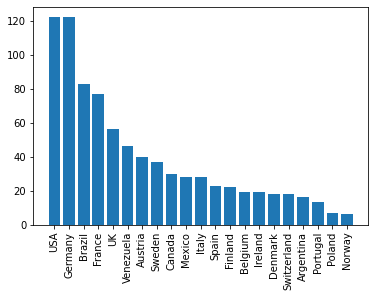

In [20]:
plt.bar(df["Country"], df["Orders"])
plt.xticks(rotation = 90) 
plt.show()

In [21]:
df['quintile'] = pd.qcut(df['Orders'], 5, labels=False)
df

,level_0,Country,Orders,rank,quintile
0,0,USA,122,very high,4
1,1,Germany,122,very high,4
2,2,Brazil,83,very high,4
3,3,France,77,very high,4
4,4,UK,56,very high,3
5,5,Venezuela,46,high,3
6,6,Austria,40,high,3
7,7,Sweden,37,high,3
8,8,Canada,30,high,2
9,9,Mexico,28,high,2


In [24]:
#find the sum of orders for each quintile
\for q in range(0,4):
    total= df[["Country", "Orders", "quintile"]].loc[(df["quintile"]== q)].Orders.sum()
    print ("the total for quintile " +str(q) + " is {} ".format(total))

the total for quintile 0 is 78 
the total for quintile 1 is 60 
the total for quintile 2 is 109 
the total for quintile 3 is 179 


In [27]:
#find the average for each quintile
for q in range(0,5):
    total= df[["Country", "Orders", "quintile"]].loc[(df["quintile"]== q)].Orders.mean()
    print ("the average for quintile " +str(q) + " is {} ".format(total))

the average for quintile 0 is 13.0 
the average for quintile 1 is 20.0 
the average for quintile 2 is 27.25 
the average for quintile 3 is 44.75 
the average for quintile 4 is 101.0 


In [28]:
#take a look at average orders by rank
my_list= ["low", "medium", "high", "very high"]
for q in my_list:
    total= df[["Country", "Orders", "quintile"]].loc[(df["rank"]== q)].Orders.mean()
    total = round(total,2)
    print ("the average for countires ranked " +str(q) + " is {} ".format(total))

the average for countires ranked low is 6.5 
the average for countires ranked medium is 17.17 
the average for countires ranked high is 31.75 
the average for countires ranked very high is 92.0 


In [30]:
#look at ratios between low and high orders

ratio= round(max(df["Orders"])/min(df["Orders"]),1)
print ("The maximum order is " + str(ratio) + " times as big as the smallest order.")

ratio2= 100* round(min(df["Orders"])/max(df["Orders"]),3)
print ("The maximum order is " + str(ratio2) + "% as big as the smallest order.")


The maximum order is 20.3 times as big as the smallest order.
The maximum order is 4.9% as big as the smallest order.


In [31]:
#add a row to the dataframe that represents the ratio of orders compared to the highest level of orders
# Create an empty list
Row_list =[]
Ratio_list=[]  
# Iterate over each row
for index, rows in df.iterrows():
    # Create list for the current row
    my_list =[rows.Country, rows.Orders]
    ratio3=round((rows.Orders/122),3)
    Ratio_list.append( ratio3)  
    # append the list to the final list
    my_list.append(ratio3)
    Row_list.append(my_list)


In [32]:
percent_of_max= pd.DataFrame(Row_list)
percent_of_max

,0,1,2
0,USA,122,1.000
1,Germany,122,1.000
2,Brazil,83,0.680
3,France,77,0.631
4,UK,56,0.459
5,Venezuela,46,0.377
6,Austria,40,0.328
7,Sweden,37,0.303
8,Canada,30,0.246
9,Mexico,28,0.230


In [34]:
#merge with original data frame and clean
newest= df.merge(percent_of_max, how='inner', left_on = "Country", right_on= 0)
new_orders= newest.rename(columns= {0: "Country2", 1: "rank2", 2:"percent_of_max_country"})
new_orders= new_orders.drop(columns = ["rank2", "Country2"])
new_orders

,level_0,Country,Orders,rank,quintile,percent_of_max_country
0,0,USA,122,very high,4,1.000
1,1,Germany,122,very high,4,1.000
2,2,Brazil,83,very high,4,0.680
3,3,France,77,very high,4,0.631
4,4,UK,56,very high,3,0.459
5,5,Venezuela,46,high,3,0.377
6,6,Austria,40,high,3,0.328
7,7,Sweden,37,high,3,0.303
8,8,Canada,30,high,2,0.246
9,9,Mexico,28,high,2,0.230


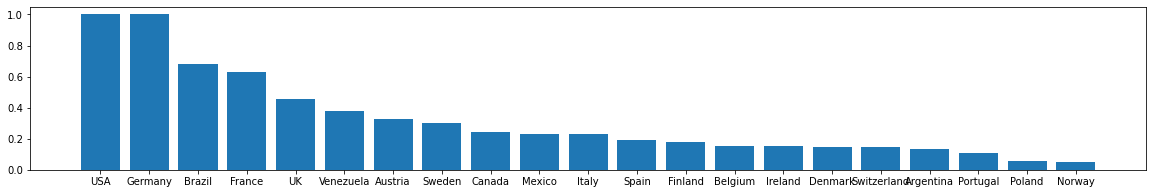

In [36]:
#graph the orders for each country as the percent of the max country orders
plt.bar(new_orders["Country"], new_orders["percent_of_max_country"])
plt.rcParams["figure.figsize"] = (20,3)

plt.show()